In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'label')

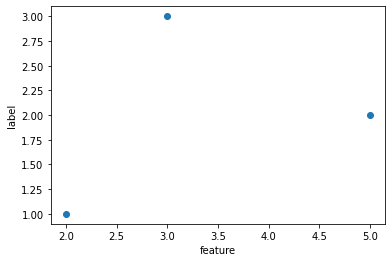

In [2]:
data = np.array([
    [2, 3, 5],
    [1, 3, 2]
])
plt.scatter(data[0], data[1])
plt.xlabel('feature')
plt.ylabel('label')

## Polynomial Regression

In [11]:
degree = 5
X = np.row_stack([data[0]**i for i in range(degree + 1)])
#X = np.vander(data[0], N = degree + 1, increasing=True).T
y = data[1].reshape(-1, 1)
X, y

(array([[   1,    1,    1],
        [   2,    3,    5],
        [   4,    9,   25],
        [   8,   27,  125],
        [  16,   81,  625],
        [  32,  243, 3125]]),
 array([[1],
        [3],
        [2]]))

In [12]:
X@X.T

array([[      3,      10,      38,     160,     722,    3400],
       [     10,      38,     160,     722,    3400,   16418],
       [     38,     160,     722,    3400,   16418,   80440],
       [    160,     722,    3400,   16418,   80440,  397442],
       [    722,    3400,   16418,   80440,  397442, 1973320],
       [   3400,   16418,   80440,  397442, 1973320, 9825698]])

In [13]:
X@y

array([[   6],
       [  21],
       [  81],
       [ 339],
       [1509],
       [7011]])

In [23]:
c = 1e10
theta_hat1 = np.linalg.solve((X @ X.T) + c*np.eye(X.shape[0]), X @ y) # good
theta_hat2 = np.linalg.inv((X @ X.T) + c*np.eye(X.shape[0])) @ X @ y # bad
theta_hat1, theta_hat2

(array([[5.99750411e-10],
        [2.09879627e-09],
        [8.09410649e-09],
        [3.38708927e-08],
        [1.50755514e-07],
        [7.00380663e-07]]),
 array([[5.99750411e-10],
        [2.09879627e-09],
        [8.09410649e-09],
        [3.38708927e-08],
        [1.50755514e-07],
        [7.00380663e-07]]))

Probe:

In [19]:
np.dot(X[:,2], theta_hat1), y[2]

(array([2.]), array([2]))

## Prediction

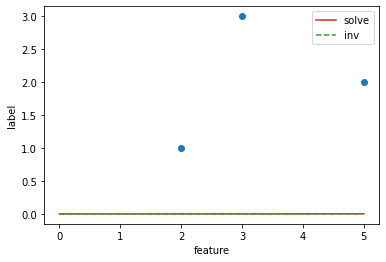

In [24]:
x_pred = np.linspace(0, 5, 100)
X_pred = np.row_stack([x_pred**i for i in range(degree + 1)])

pred1 = X_pred.T@theta_hat1
pred2 = X_pred.T@theta_hat2

plt.plot(x_pred, pred1, color = 'tab:red', label = 'solve')
plt.plot(x_pred, pred2, color = 'tab:green', label = 'inv', linestyle = '--')


plt.scatter(data[0], data[1], zorder=2)
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()